# **Ali Jahanbanian & Morteza Pirahmadian**

# **Loading Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pylab as pl
import seaborn as sns

# **Load CSV**

In [23]:
#load file csv
df= pd.read_csv("CoffeeAndCode.csv")
df



,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
95,6,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
96,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


# **Data Preprocessing**



In [24]:
#first three rows in the DataFrame
#first 5 rows in the DataFrame
print(df.tail(5))
df.head(3)

    CodingHours  CoffeeCupsPerDay     CoffeeTime CodingWithoutCoffee  \
95            6                 2  Before coding                 Yes   
96            4                 1  Before coding           Sometimes   
97           10                 3  Before coding                 Yes   
98            2                 2   While coding           Sometimes   
99           10                 4  Before coding           Sometimes   

                  CoffeeType CoffeeSolveBugs  Gender  Country  AgeRange  
95                   Nescafe             Yes    Male  Lebanon  18 to 29  
96                   Nescafe       Sometimes  Female  Lebanon  18 to 29  
97                Cappuccino             Yes    Male  Lebanon  Under 18  
98    Espresso (Short Black)       Sometimes  Female  Lebanon  18 to 29  
99  Double Espresso (Doppio)       Sometimes    Male  Lebanon  18 to 29  


,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29


In [4]:
#dimensionality of the DataFrame
df.shape

(100, 9)

In [5]:
#type of each attribute
df.dtypes

CodingHours             int64
CoffeeCupsPerDay        int64
CoffeeTime             object
CodingWithoutCoffee    object
CoffeeType             object
CoffeeSolveBugs        object
Gender                 object
Country                object
AgeRange               object
dtype: object

In [27]:
df.isnull().any()

CodingHours            False
CoffeeCupsPerDay       False
CoffeeTime             False
CodingWithoutCoffee    False
CoffeeType              True
CoffeeSolveBugs        False
Gender                 False
Country                False
AgeRange                True
dtype: bool

 **Things to do for DataPreProcessing**

**1.fill parts have N/A fiels with mode**

**2.drop duplicated rows**

**3.drop 'Country' column because all of them are same and useless in dataset**

In [33]:
#delete nul items...
df[df.columns[8]].fillna(df[df.columns[8]].mode()[0], inplace=True)
df[df.columns[4]].fillna(df[df.columns[4]].mode()[0], inplace=True)

#number of duplicate data in the DataFrame
print(df.duplicated().sum())  
#get index of duplicated rows
print(df.index[df.duplicated()]) #142
#removing duplicate data from the Dataframe
df.drop_duplicates()

#get the number of a country and when all of them are same whe delete column
group = df.groupby(['Country']).size()
print(group)

df.drop('Country', inplace=True, axis=1)
df
#df.T.drop_duplicates().T
#df

3
Int64Index([16, 41, 50], dtype='int64')
Country
Lebanon    100
dtype: int64


,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,AgeRange
0,8,2,0,2,2.0,Sometimes,1,2.0
1,3,2,0,2,1.0,Yes,1,3.0
2,5,3,6,0,6.0,Yes,1,2.0
3,8,2,0,0,6.0,Yes,1,2.0
4,10,3,6,1,7.0,No,1,2.0
...,...,...,...,...,...,...,...,...
95,6,2,0,2,6.0,Yes,1,2.0
96,4,1,0,1,6.0,Sometimes,1,2.0
97,10,3,0,2,3.0,Yes,1,1.0
98,2,2,6,1,5.0,Sometimes,1,2.0


In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# #Convert Groups to Numeric
# #groupby --> get the group
# #size --> get the number of each diffrence parts
# #keys --> make a list by each parts and can acess by index

# CodingHours = df.groupby(['CoffeeTime']).size().keys()
# CodingHours = label_encoder.fit_transform(CodingHours)
# CodingHours

df["Gender"] = np.where(df["Gender"] == "Female", 0,1)

df['CoffeeTime'].mask(df['CoffeeTime'] == 'Before coding', 0, inplace=True)
df['CoffeeTime'].mask(df['CoffeeTime'] == 'After coding', 1, inplace=True)
df['CoffeeTime'].mask(df['CoffeeTime'] == 'In the morning', 2, inplace=True)
df['CoffeeTime'].mask(df['CoffeeTime'] == 'All the time', 3, inplace=True)
df['CoffeeTime'].mask(df['CoffeeTime'] == 'Before and while coding', 4, inplace=True)
df['CoffeeTime'].mask(df['CoffeeTime'] == 'No specific time', 5, inplace=True)
df['CoffeeTime'].mask(df['CoffeeTime'] == 'While coding', 6, inplace=True)
#convert object to numeric
df['CoffeeTime'] = pd.to_numeric(df['CoffeeTime'])


df['CodingWithoutCoffee'].mask(df['CodingWithoutCoffee'] == 'No', 0, inplace=True)

df['CodingWithoutCoffee'].mask(df['CodingWithoutCoffee'] == 'Sometimes', 1, inplace=True)
df['CodingWithoutCoffee'].mask(df['CodingWithoutCoffee'] == 'Yes', 2, inplace=True)

df['CodingWithoutCoffee'] = pd.to_numeric(df['CodingWithoutCoffee'])


df['AgeRange'].mask(df['AgeRange'] == 'Under 18', 1, inplace=True)
df['AgeRange'].mask(df['AgeRange'] == '18 to 29', 2, inplace=True)
df['AgeRange'].mask(df['AgeRange'] == '30 to 39', 3, inplace=True)
df['AgeRange'].mask(df['AgeRange'] == '40 to 49', 4, inplace=True)
df['AgeRange'].mask(df['AgeRange'] == '50 to 59', 5, inplace=True)
df['AgeRange'] = pd.to_numeric(df['AgeRange'])


df['CoffeeType'].mask(df['CoffeeType'] == 'American Coffee', 0, inplace=True)
df['CoffeeType'].mask(df['CoffeeType'] == 'Americano', 1, inplace=True)
df['CoffeeType'].mask(df['CoffeeType'] == 'Caffè latte', 2, inplace=True)
df['CoffeeType'].mask(df['CoffeeType'] == 'Cappuccino', 3, inplace=True)
df['CoffeeType'].mask(df['CoffeeType'] == 'Double Espresso (Doppio)', 4, inplace=True)
df['CoffeeType'].mask(df['CoffeeType'] == 'Espresso (Short Black)', 5, inplace=True)
df['CoffeeType'].mask(df['CoffeeType'] == 'Nescafe', 6, inplace=True)
df['CoffeeType'].mask(df['CoffeeType'] == 'Turkish', 7, inplace=True)
df['CoffeeType'] = pd.to_numeric(df['CoffeeType'])









df


,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,AgeRange
0,8,2,0,2,2.0,Sometimes,1,2.0
1,3,2,0,2,1.0,Yes,1,3.0
2,5,3,6,0,6.0,Yes,1,2.0
3,8,2,0,0,6.0,Yes,1,2.0
4,10,3,6,1,7.0,No,1,2.0
...,...,...,...,...,...,...,...,...
95,6,2,0,2,6.0,Yes,1,2.0
96,4,1,0,1,6.0,Sometimes,1,2.0
97,10,3,0,2,3.0,Yes,1,1.0
98,2,2,6,1,5.0,Sometimes,1,2.0


In [37]:
df.dtypes

CodingHours              int64
CoffeeCupsPerDay         int64
CoffeeTime               int64
CodingWithoutCoffee      int64
CoffeeType             float64
CoffeeSolveBugs         object
Gender                   int32
AgeRange               float64
dtype: object

In [38]:
#description of the data in the DataFrame
df.describe()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,Gender,AgeRange
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000
mean,6.410000,2.890000,4.070000,1.110000,4.160000,1.0,2.420000
std,2.644205,1.613673,2.617945,0.694786,2.699495,0.0,0.684312
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,4.000000,2.000000,0.750000,1.000000,1.750000,1.0,2.000000
50%,7.000000,2.500000,6.000000,1.000000,6.000000,1.0,2.000000
75%,8.000000,4.000000,6.000000,2.000000,6.000000,1.0,3.000000
max,10.000000,8.000000,6.000000,2.000000,7.000000,1.0,5.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CodingHours          100 non-null    int64  
 1   CoffeeCupsPerDay     100 non-null    int64  
 2   CoffeeTime           100 non-null    int64  
 3   CodingWithoutCoffee  100 non-null    int64  
 4   CoffeeType           100 non-null    float64
 5   CoffeeSolveBugs      100 non-null    object 
 6   Gender               100 non-null    int32  
 7   AgeRange             100 non-null    float64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 6.0+ KB


**missing values**

The results show that the iris data set has no missing value.

**Visualizing the Pre-Processed Data**

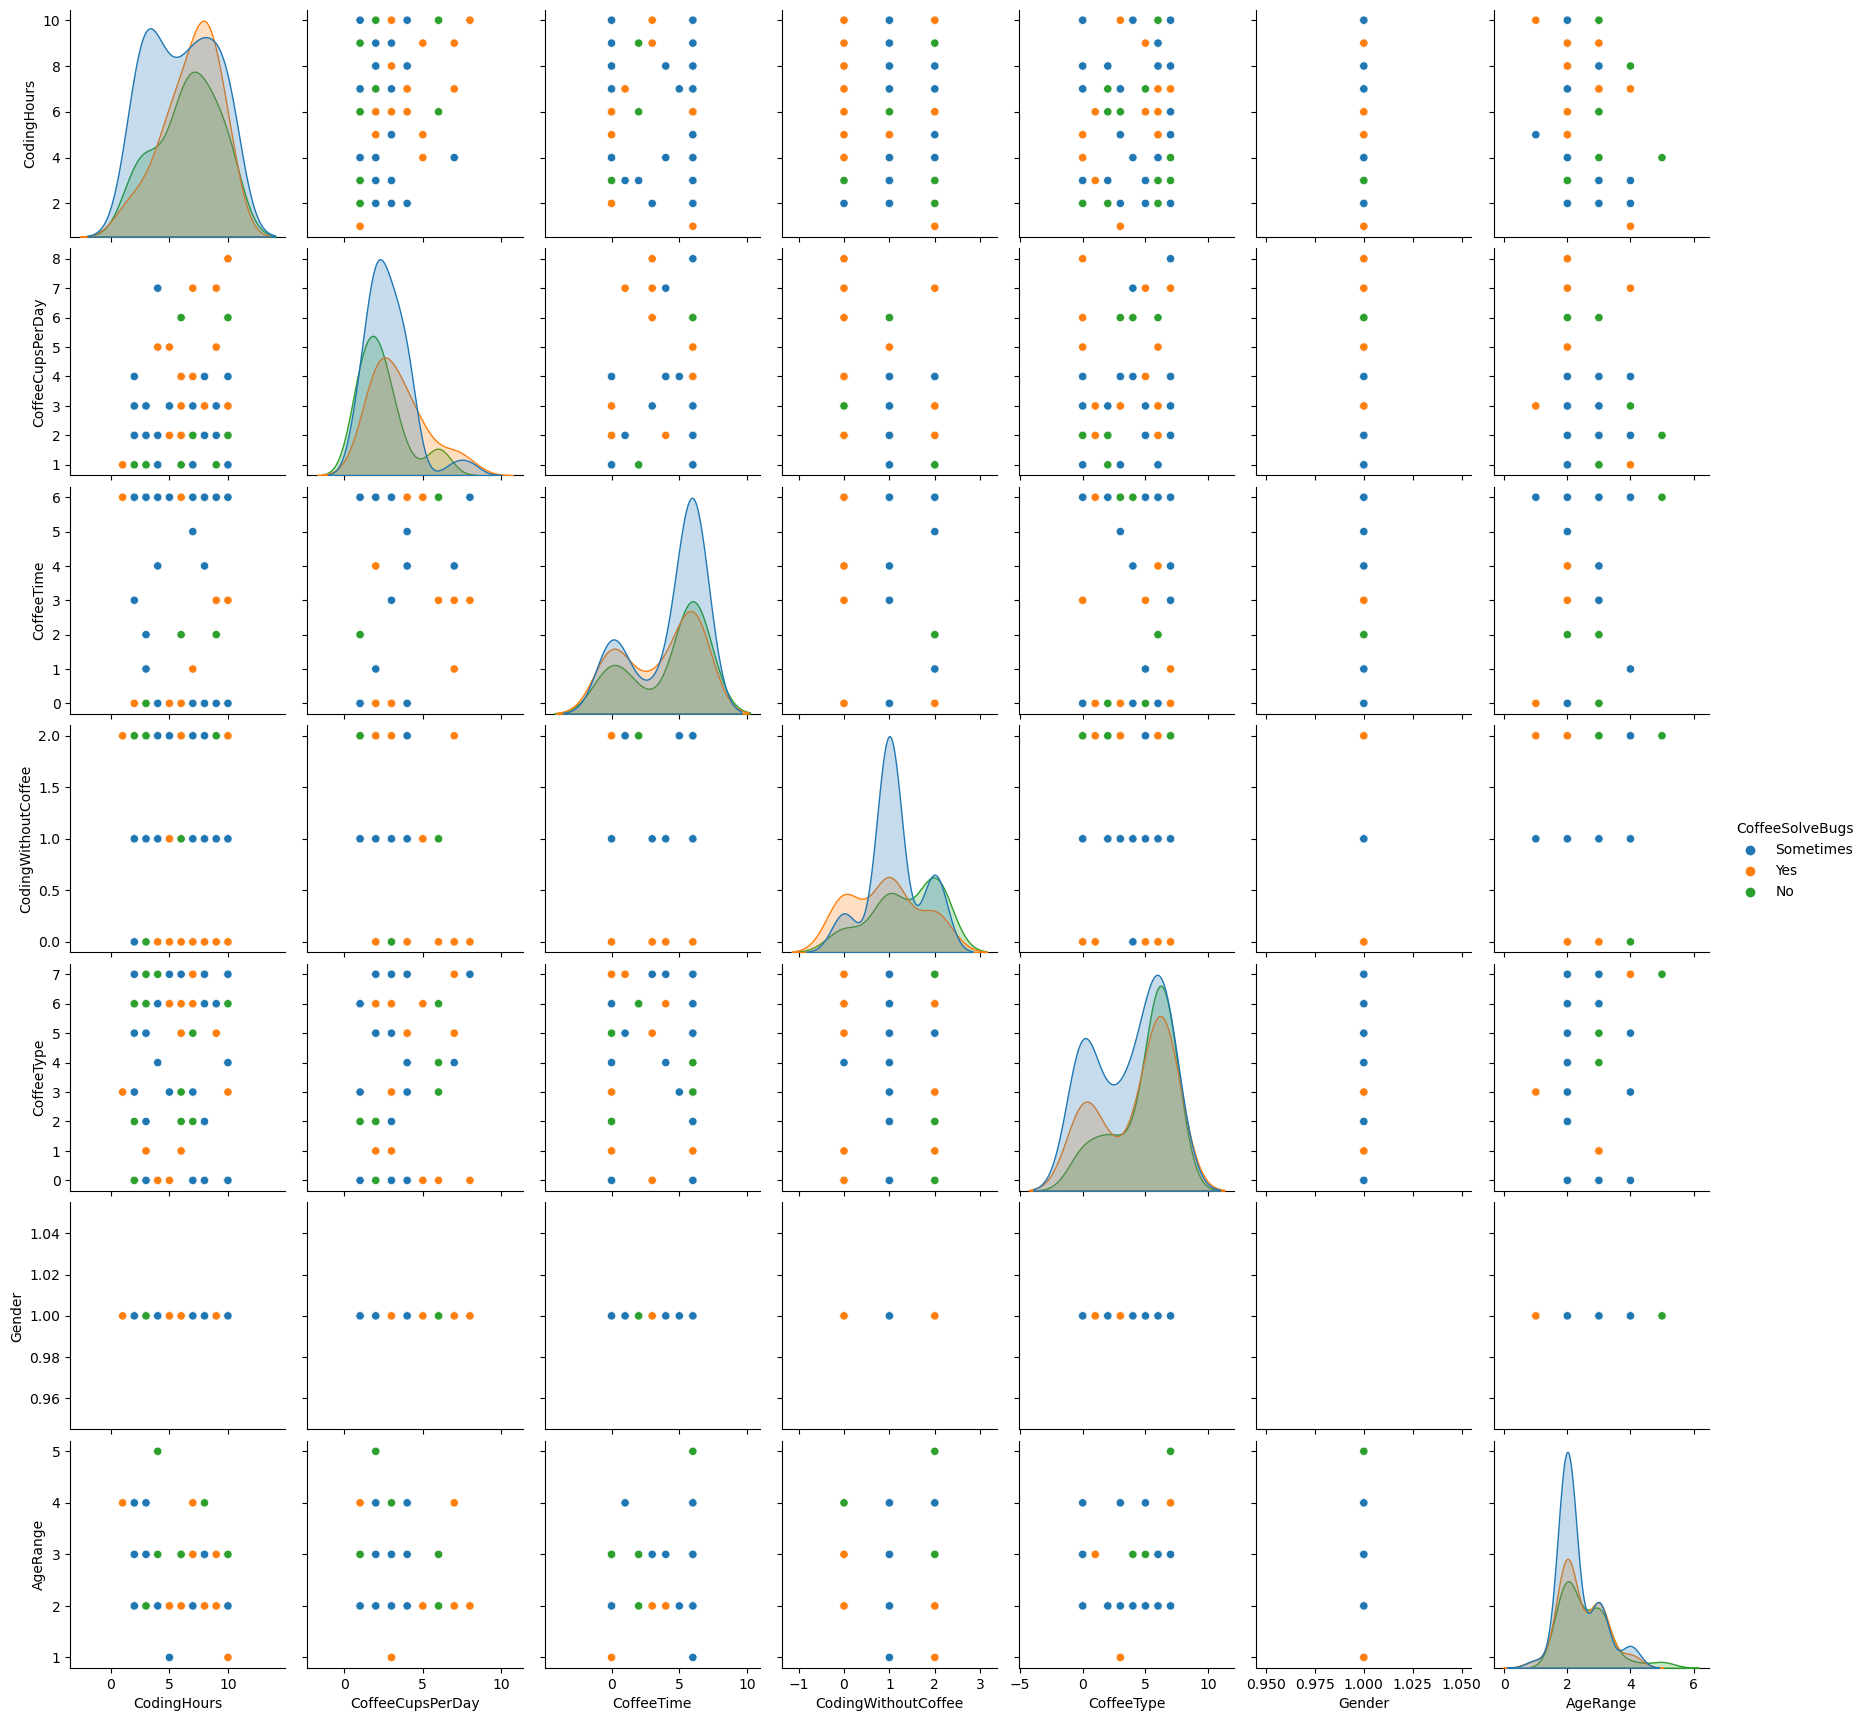

In [40]:
sns.pairplot(df, hue="CoffeeSolveBugs")
plt.show()

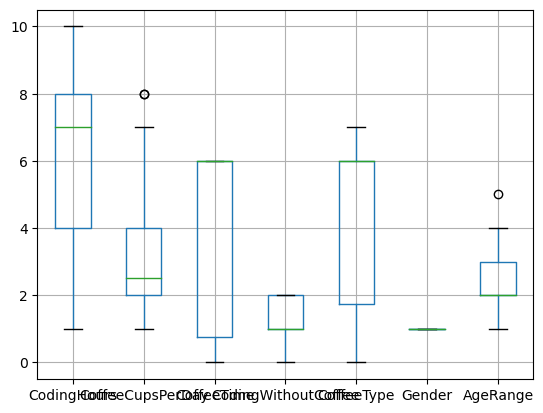

In [41]:
#boxplot
df.boxplot()
plt.show()

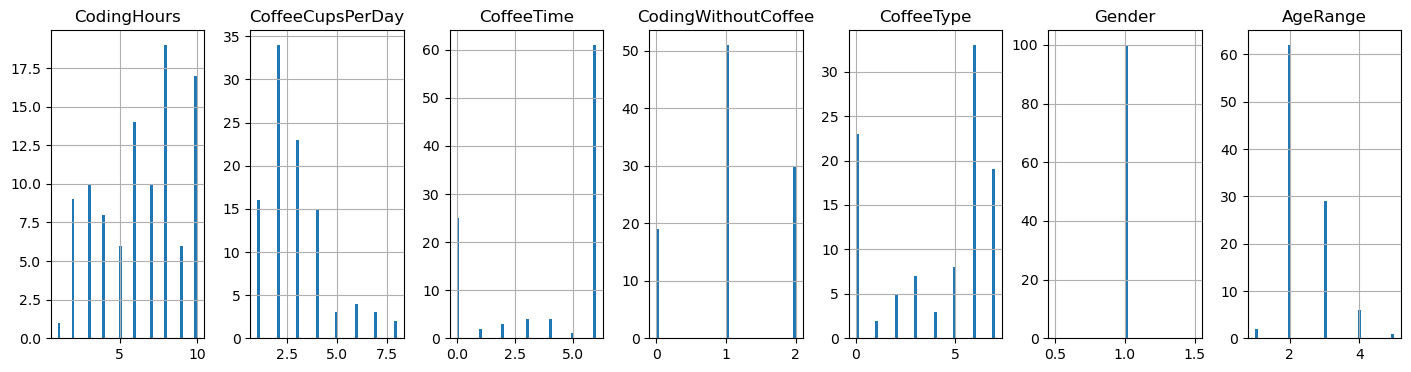

In [42]:
#Histogram
df.hist(bins=50, layout=(1,8), figsize=(20, 4))
plt.show()

# **Classification**

**Spliting the Dataset**

In [43]:
vertical_concat = pd.concat([df.iloc[:, :5], df.iloc[:, 6:9],df.iloc[:, 5]], axis=1)
df=vertical_concat
df1 = df
df

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,Gender,AgeRange,CoffeeSolveBugs
0,8,2,0,2,2.0,1,2.0,Sometimes
1,3,2,0,2,1.0,1,3.0,Yes
2,5,3,6,0,6.0,1,2.0,Yes
3,8,2,0,0,6.0,1,2.0,Yes
4,10,3,6,1,7.0,1,2.0,No
...,...,...,...,...,...,...,...,...
95,6,2,0,2,6.0,1,2.0,Yes
96,4,1,0,1,6.0,1,2.0,Sometimes
97,10,3,0,2,3.0,1,1.0,Yes
98,2,2,6,1,5.0,1,2.0,Sometimes


# **Convert Nominal to Numeric**

In [44]:
from sklearn.model_selection import train_test_split
#datas of target feature = y
#datas of other features = x


x=df.iloc[:,:6]
print(x)
y=df.iloc[:,6]
print(y)
# Split data into the training sets and the testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=45)
print(x_train.shape) #(127, 4)
print(x_test.shape) #(23, 4)

    CodingHours  CoffeeCupsPerDay  CoffeeTime  CodingWithoutCoffee  \
0             8                 2           0                    2   
1             3                 2           0                    2   
2             5                 3           6                    0   
3             8                 2           0                    0   
4            10                 3           6                    1   
..          ...               ...         ...                  ...   
95            6                 2           0                    2   
96            4                 1           0                    1   
97           10                 3           0                    2   
98            2                 2           6                    1   
99           10                 4           0                    1   

    CoffeeType  Gender  
0          2.0       1  
1          1.0       1  
2          6.0       1  
3          6.0       1  
4          7.0       1  
..       

**Model1 : DecisionTree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
model1 = DecisionTreeClassifier().fit(x_test,y_test)
model1.fit(x_test,y_test)
y_pred = model1.predict(x_test)

In [46]:
from sklearn.metrics import *
#summery of model
print(classification_report(y_test, y_pred))
#accuracy
accuracy=accuracy_score(y_pred,y_test)*100
print(accuracy)

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         8
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

100.0


**Model2 : Svm**

In [47]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train, y_train)
y_pred=model2.predict(x_test)

In [48]:
#summery of model
print(classification_report(y_test, y_pred))
#accuracy
accuracy=accuracy_score(y_pred,y_test)*100
print(accuracy)

              precision    recall  f1-score   support

         2.0       0.53      1.00      0.70         8
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         2

    accuracy                           0.53        15
   macro avg       0.18      0.33      0.23        15
weighted avg       0.28      0.53      0.37        15

53.333333333333336


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
